<a href="https://colab.research.google.com/github/Prajaktahz/Uni_Colab_Work/blob/main/Prac-2-Preprocessing_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## N/LAB: Machine Learning and Advanced Analytics
![alt text](http://www.cs.nott.ac.uk/~pszgss/teaching/nlab.png)

# Practical: sklearn preprocessing framework
## Task 2/2


### Predicting Wine (modified problem, please use CSV URL).
http://www.cs.nott.ac.uk/~pszgss/teaching/ML/Prac2/winequality-red.csv

**Input variables (based on physicochemical tests from samples from a glass):**
<br>fixed acidity
<br>volatile acidity
<br>citric acid
<br>residual sugar
<br>chlorides
<br>free sulfur dioxide
<br>total sulfur dioxide
<br>density
<br>pH
<br>sulphates
<br>alcohol
<br>**Output variable (based on sensory data): **
<br>quality (score between 0 and 10)

**Problem:** Predict the wine quality score

# Task 1
Implement and compare both a mean learner and a kNN regressor.
<br>Test via cross validation.

<br>**HINT 1:** There are missing values. Decide how you will deal with this and implement your solution.
<br>**HINT 2:** If you would like to use kNN imputation then use the package from sklearn.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('http://www.cs.nott.ac.uk/~pszgss/teaching/ML/Prac2/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
2,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
3,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
4,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3


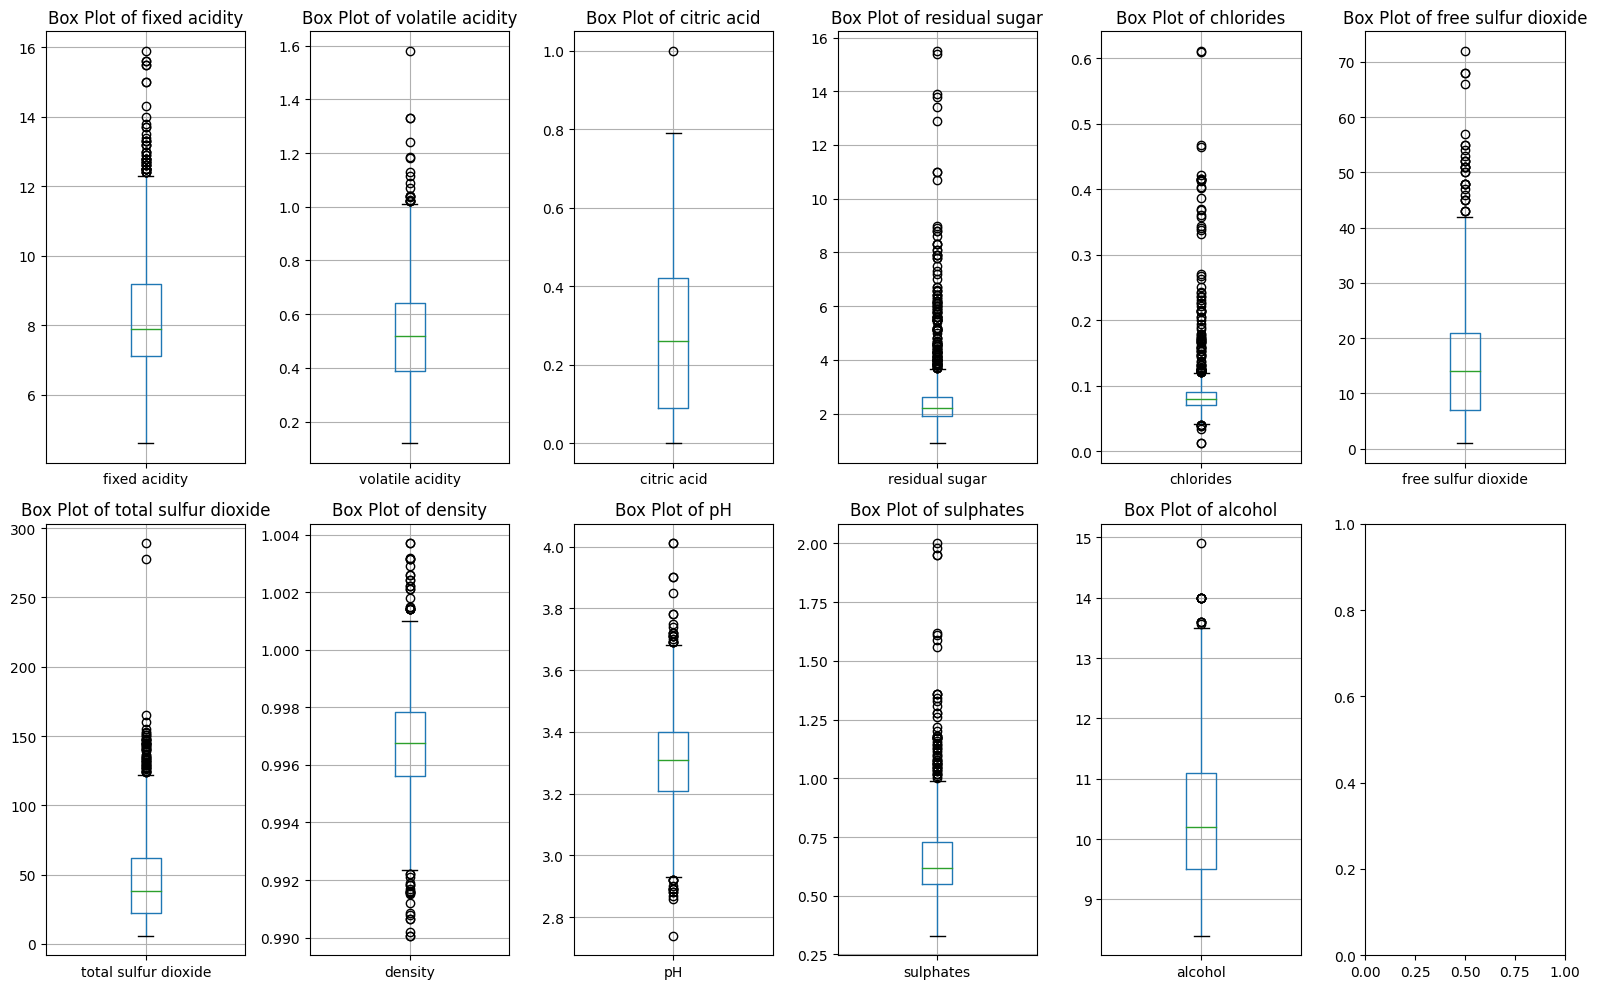

In [33]:
# Plot box plots for all input features
input_features = list(df.columns[:-1])
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(16,10))
fig.subplots_adjust(hspace=1.0)

for i in range(len(input_features)):
    row, col = i // 6, i % 6
    ax = df.boxplot(column=input_features[i], ax=axes[row, col])
    ax.set_title(f'Box Plot of {input_features[i]}')

plt.tight_layout()
plt.show()

In [34]:
# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Display the count of outliers for each feature
print("Number of outliers in each feature:")
print(outliers)

Number of outliers in each feature:
fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          149
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


In [35]:
#Checking for null values
df.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar          14
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64

<Axes: >

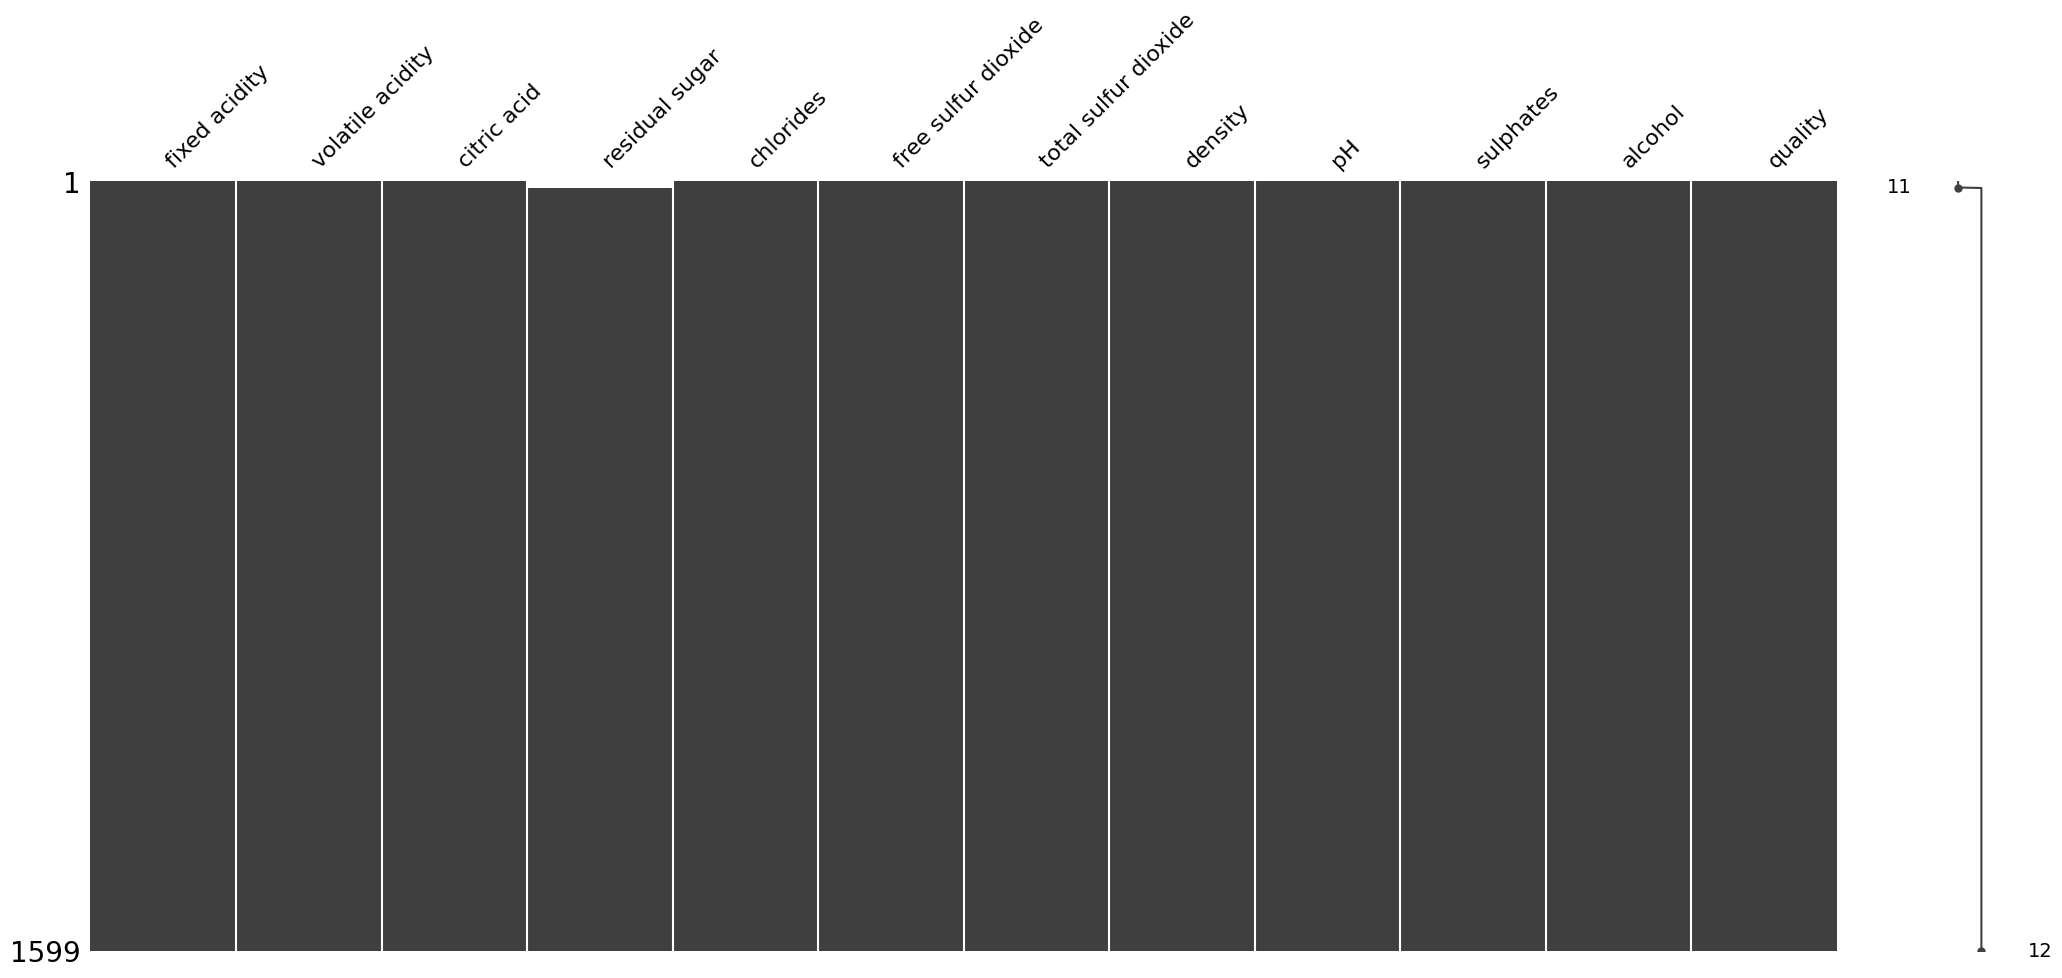

In [36]:
import missingno as msno
msno.matrix(df, sort='ascending')

In [37]:
df.shape

(1599, 12)

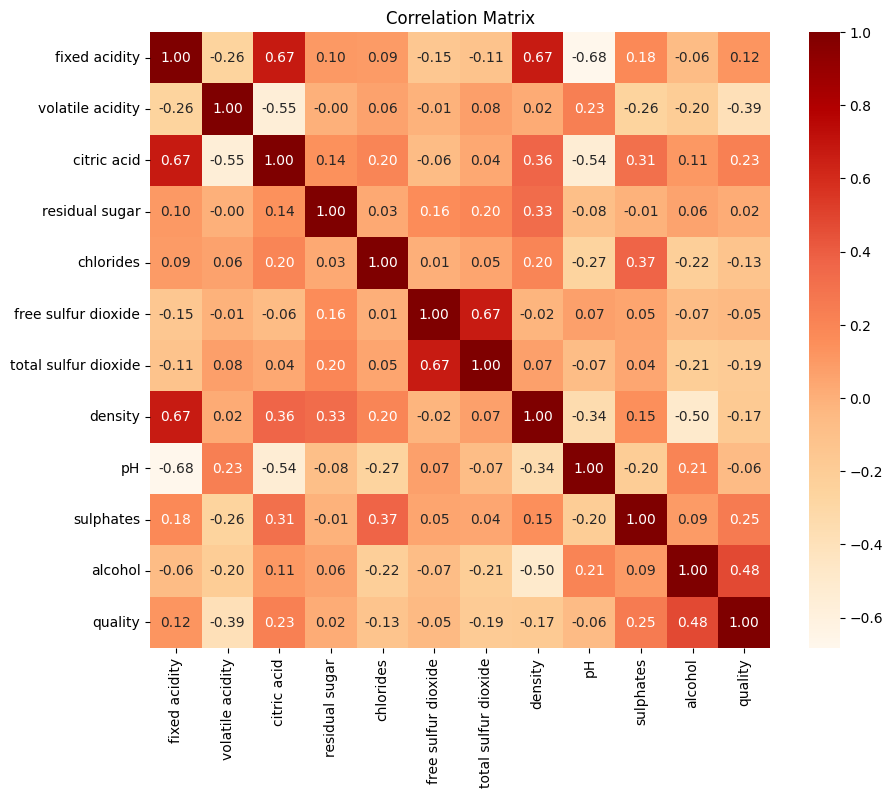

In [38]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [39]:
df_cleaned = df.dropna(axis = 0)
df_cleaned.shape

(1585, 12)

In [40]:
df_cleaned.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
### since all are numeric no need of encoding

In [41]:
X = df_cleaned.drop('quality', axis = 1)
y = df_cleaned.quality

In [42]:
X.head(2)
print(X.shape)

(1585, 11)


In [43]:
y.nunique()

6

In [44]:
from sklearn.model_selection import cross_val_score, KFold

# Create the training and test splits (all k = 10 of them) for reuse for evaluating each classifier
folds = KFold(n_splits=10, shuffle=True, random_state=0)

In [45]:
### Applying mean regressor
ml = DummyRegressor(strategy='mean')
knn = KNeighborsRegressor()

folds = KFold(n_splits=10, shuffle=True, random_state=0)
scores = {}
scores['Mean Learner, MAE'] = -cross_val_score(ml, X, y, scoring = 'neg_mean_absolute_error', cv=folds)
scores['Mean Learner, MSE'] = -cross_val_score(ml, X, y, scoring = 'neg_mean_squared_error', cv=folds)
scores['KNN, MAE'] = -cross_val_score(knn, X, y, scoring = 'neg_mean_absolute_error', cv=folds)
scores['KNN, MSE'] = -cross_val_score(knn, X, y, scoring = 'neg_mean_squared_error', cv=folds)

In [46]:
for k in sorted(scores):
    print('{0:20}: {1:5.4f}'.format(k, np.mean(scores[k])) )

KNN, MAE            : 0.5669
KNN, MSE            : 0.5638
Mean Learner, MAE   : 0.6808
Mean Learner, MSE   : 0.6464


0.6807547463265211 0.022258564253554193
0.6464431447715957 0.04867117096479709
0.5668728604410478 0.032822285894245476
0.5637903033197993 0.07741651756074185


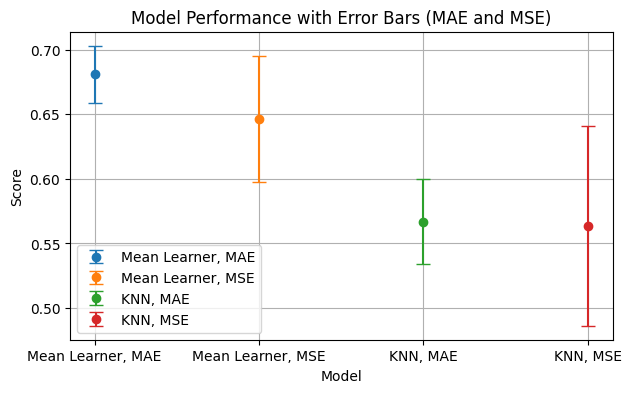

In [47]:
# Plotting graph for checking overfitting
plt.figure(figsize=(7, 4))
for key, value in scores.items():
    mean_score = np.mean(value)
    std_score = np.std(value)
    print(mean_score,std_score)
    plt.errorbar(key, mean_score, yerr=std_score, fmt='o', capsize=5, label=key)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance with Error Bars (MAE and MSE)')
plt.legend()
plt.grid(True)
plt.xticks()
plt.show()

In [ ]:
### From the above graph we can see that KNN MAE is lower than dummy regressor, however, KNN MSE has a larger error bar than the rest.
### This represents uncertainity and variability in the performance of the regressor across different folds during cross-validation.
### It could signify underlying issues related to overfitting, need for hyper parameter tuning and model instability.
### Also, we haven't scaled the input data here.

In [48]:
#Checking default parameters for knn regressor
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


# Task 2
Did the regressor perform as well as you expected? Probably not. If you didn't already, consider the scales of all variables. Are they the same? No? Copy your solution, modifying it to include a pipeline which standarizes the inputs (standard scalar). Compare and contrast the results.

**NOTE:** If you already have included a standard scalar, compare your result to one without using it.

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

In [50]:
df.shape

(1599, 12)

In [51]:
X = df.drop('quality', axis = 1)
y = df.quality

In [52]:
si = SimpleImputer(strategy = 'median')
ki = KNNImputer(weights='uniform')
ss = StandardScaler()

knn = KNeighborsRegressor()

In [53]:
new_predictor_knn =  Pipeline( steps = [ ('impuation', si), ('scaling', ss), ('model', knn) ])
new_predictor_knn1 = Pipeline( steps = [ ('impuation', ki), ('scaling', ss), ('model', knn) ])

In [54]:
folds = KFold(n_splits=10, shuffle=True, random_state=0)
scores = {}
scores['KNN, MAE'] = -cross_val_score(new_predictor_knn, X, y, scoring = 'neg_mean_absolute_error', cv=folds)
scores['KNN, MSE'] = -cross_val_score(new_predictor_knn, X, y, scoring = 'neg_mean_squared_error', cv=folds)
scores['KNNImputer, MAE'] = -cross_val_score(new_predictor_knn1, X, y, scoring = 'neg_mean_absolute_error', cv=folds)
scores['KNNImputer, MSE'] = -cross_val_score(new_predictor_knn1, X, y, scoring = 'neg_mean_squared_error', cv=folds)

In [55]:
for k in sorted(scores):
    print('{0:20}: {1:5.4f}'.format(k, np.mean(scores[k])) )

KNN, MAE            : 0.5063
KNN, MSE            : 0.4625
KNNImputer, MAE     : 0.5065
KNNImputer, MSE     : 0.4643


0.5062790880503145 0.027356755088904523
0.46251430817610056 0.04583080333508273
0.5065290880503145 0.0268596352352214
0.46426430817610065 0.046063271222555165


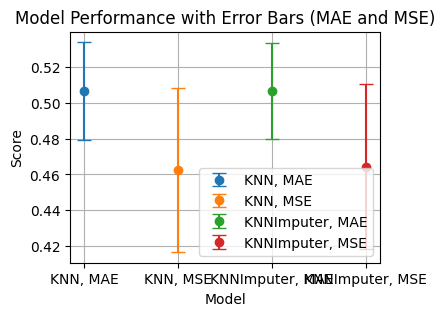

In [56]:
# Plotting graph for checking overfitting
plt.figure(figsize=(4, 3))
for key, value in scores.items():
    mean_score = np.mean(value)
    std_score = np.std(value)
    print(mean_score,std_score)
    plt.errorbar(key, mean_score, yerr=std_score, fmt='o', capsize=5, label=key)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance with Error Bars (MAE and MSE)')
plt.legend()
plt.grid(True)
plt.xticks()
plt.show()

\## Extra task (not required): Learning Curves

Plot a learning curve for you Regressor. We have covered the theory last week. See these two links and try and work it out for yourself! Ask if you have questions.

[Short Tutorial](https://thedatascientist.com/learning-curves-scikit-learn/)

[sklearn guide](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

Train scores: [0.7322851  0.58552396 0.51479348 0.5169066  0.56326837]
Test scores: [-4.85986142 -3.82650968 -3.04114819 -2.43667582 -2.21812715]


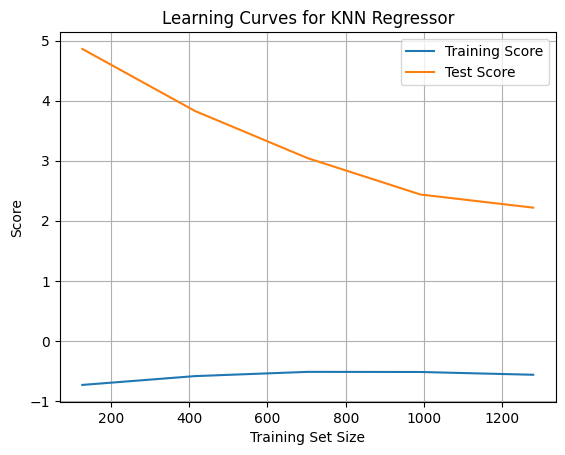

In [57]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(new_predictor_knn, X, y, train_sizes=np.linspace(0.1, 1.0, 5))
print('Train scores: ' + str(np.mean(train_scores, axis=1)))
print('Test scores: ' + str(np.mean(test_scores, axis=1)))

# Plot the learning curves
plt.figure()
plt.title("Learning Curves for KNN Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, -np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label="Test Score")

plt.legend()
plt.show()

In [58]:
score_diff = train_scores - test_scores

print("Distance between Training and Testing Learning Curves:")
score_diff_list = []
for i, size in enumerate(train_sizes):
    score_diff_list.append(np.mean(score_diff[i]))

print(min(score_diff_list))

Distance between Training and Testing Learning Curves:
2.781395517654147


# Trying with random forest regressor


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [60]:
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [61]:
new_predictor_dt =  Pipeline( steps = [ ('impuation', si), ('scaling', ss), ('model', dt) ])
new_predictor_rf =  Pipeline( steps = [ ('impuation', si), ('scaling', ss), ('model', rf) ])

In [62]:
folds = KFold(n_splits=10, shuffle=True, random_state=0)
scores = {}
scores['DT, MAE'] = -cross_val_score(new_predictor_dt, X, y, scoring = 'neg_mean_absolute_error', cv=folds)
scores['DT, MSE'] = -cross_val_score(new_predictor_dt, X, y, scoring = 'neg_mean_squared_error', cv=folds)
scores['RF, MAE'] = -cross_val_score(new_predictor_rf, X, y, scoring = 'neg_mean_absolute_error', cv=folds)
scores['RF, MSE'] = -cross_val_score(new_predictor_rf, X, y, scoring = 'neg_mean_squared_error', cv=folds)

In [63]:
for k in sorted(scores):
    print('{0:20}: {1:5.2f}'.format(k, np.mean(scores[k])) )

DT, MAE             :  0.44
DT, MSE             :  0.62
RF, MAE             :  0.41
RF, MSE             :  0.33


0.44336871069182393 0.03760900642992811
0.622181603773585 0.08152890232129245
0.41045259433962267 0.026641907696651392
0.3266175369496856 0.054003373570640244


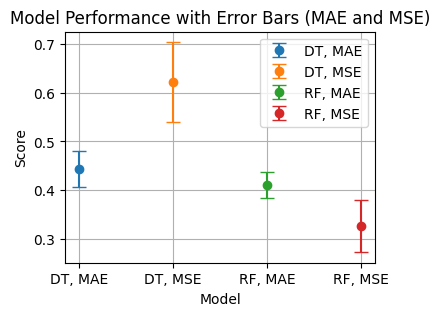

In [64]:
# Plotting graph for checking overfitting
plt.figure(figsize=(4, 3))
for key, value in scores.items():
    mean_score = np.mean(value)
    std_score = np.std(value)
    print(mean_score,std_score)
    plt.errorbar(key, mean_score, yerr=std_score, fmt='o', capsize=5, label=key)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance with Error Bars (MAE and MSE)')
plt.legend()
plt.grid(True)
plt.xticks()
plt.show()

Train scores: [0.95149447 0.92210922 0.92837761 0.92126362 0.93257946]
Test scores: [-11.79313405 -10.43447051  -6.51747754  -4.14851045  -2.39599168]


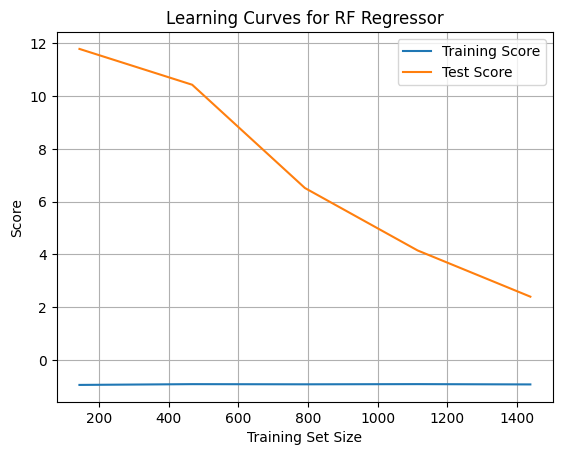

In [65]:
train_sizes, train_scores, test_scores = learning_curve(new_predictor_rf, X, y, cv=10,random_state=0)
print('Train scores: ' + str(np.mean(train_scores, axis=1)))
print('Test scores: ' + str(np.mean(test_scores, axis=1)))

# Plot the learning curves
plt.figure()
plt.title("Learning Curves for RF Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, -np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label="Test Score")

plt.legend()
plt.show()

In [66]:
score_diff = train_scores - test_scores

print("Distance between Training and Testing Learning Curves:")
score_diff_list = []
for i, size in enumerate(train_sizes):
    score_diff_list.append(np.mean(score_diff[i]))

print(min(score_diff_list))

Distance between Training and Testing Learning Curves:
3.328571139803512


Train scores: [1. 1. 1. 1. 1.]
Test scores: [-12.63358793 -11.4000387   -6.49241002  -4.52393933  -3.21858096]


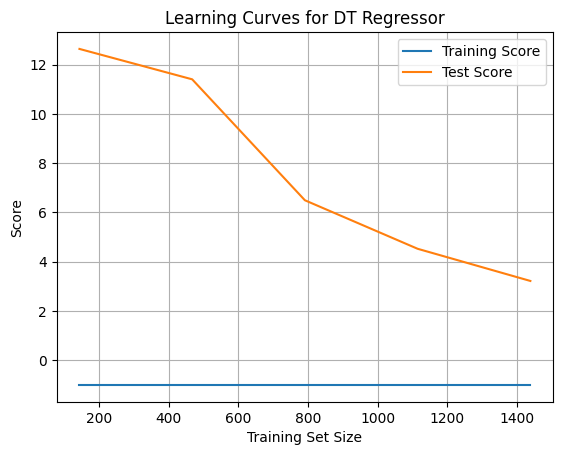

In [67]:
train_sizes, train_scores, test_scores = learning_curve(new_predictor_dt, X, y, cv=10,random_state=0)
print('Train scores: ' + str(np.mean(train_scores, axis=1)))
print('Test scores: ' + str(np.mean(test_scores, axis=1)))

# Plot the learning curves
plt.figure()
plt.title("Learning Curves for DT Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, -np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label="Test Score")

plt.legend()
plt.show()

In [68]:
score_diff = train_scores - test_scores

print("Distance between Training and Testing Learning Curves:")
score_diff_list = []
for i, size in enumerate(train_sizes):
    score_diff_list.append(np.mean(score_diff[i]))

print(min(score_diff_list))

Distance between Training and Testing Learning Curves:
4.218580963955123


In [ ]:
  ## As per the learning curves for knn, dt, rf, I conclude that knn is a better model for the given data.